In [11]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Import dataset
df = pd.read_csv('BRCA.csv')
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [13]:
# Drop unnessary columns, missing rows and duplicate values
droplist = ['ER status','PR status','Protein1','Protein2','Protein3','Protein4']
df.drop(droplist, axis=1, inplace=True)
df.dropna(axis=0, inplace=True)
df.drop_duplicates(inplace=True)

<AxesSubplot:xlabel='count', ylabel='Surgery_type'>

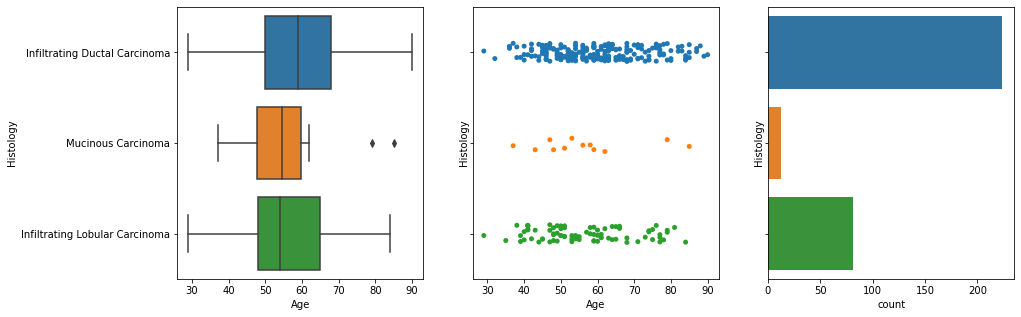

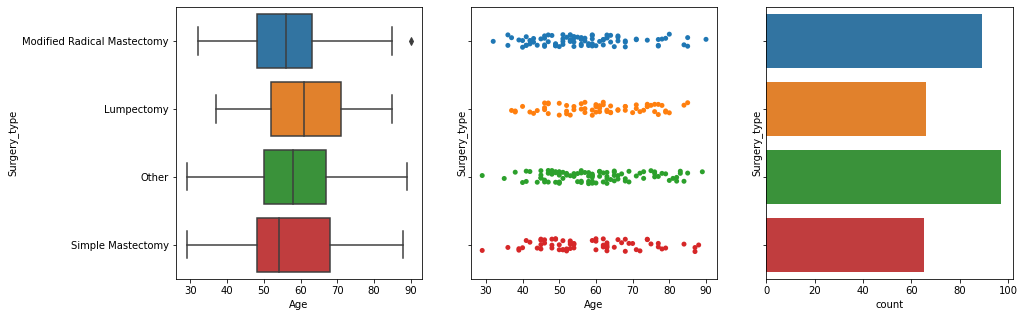

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.boxplot(ax=ax[0], x=df['Age'], y=df['Histology'])
sns.stripplot(ax=ax[1], x=df['Age'], y=df['Histology'])
sns.countplot(ax=ax[2], y=df['Histology'])

fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.boxplot(ax=ax[0], x=df['Age'], y=df['Surgery_type'])
sns.stripplot(ax=ax[1], x=df['Age'], y=df['Surgery_type'])
sns.countplot(ax=ax[2], y=df['Surgery_type'])

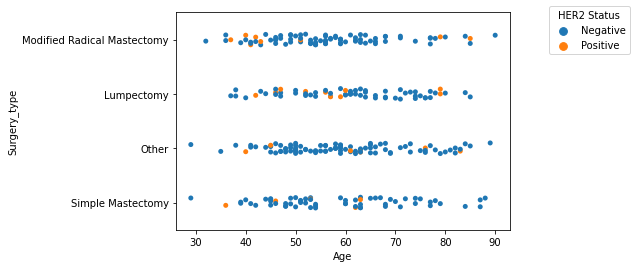

In [15]:
fig = plt.figure()
ax = plt.subplot(111)

sns.stripplot(data=df, x='Age', y='Surgery_type', hue='HER2 status')
ax.legend(bbox_to_anchor=(1.1, 1.05), title='HER2 Status')
plt.show()

In [58]:
conditions = [
    (df['Age'] < 35),
    (df['Age'] >= 35) & (df['Age'] <= 55),
    (df['Age'] > 55)
]

values = ['Young (<35)', 'Middle Age (35-55)', 'Old (>55)']

df['Age-group'] = np.select(conditions, values)
pd.crosstab(df['Patient_Status'], df['Age-group'], margins=True)

Age-group,Middle Age (35-55),Old (>55),Young (<35),All
Patient_Status,,,,
Alive,111,143,1,255
Dead,23,37,2,62
All,134,180,3,317


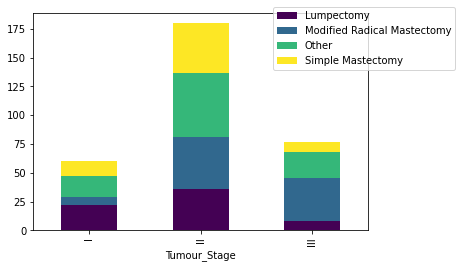

In [72]:
pd.crosstab(df['Tumour_Stage'], df['Surgery_type']).plot(kind='bar', stacked=True, colormap='viridis')
plt.legend(bbox_to_anchor=(0.7, 1.05))

<AxesSubplot:title={'center':'Figure 1: Patient Status Count by Age Group'}, xlabel='Patient_Status', ylabel='Count'>

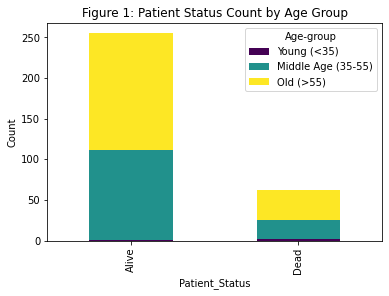

In [61]:
title = 'Figure 1: Patient Status Count by Age Group'
age_g = pd.crosstab(df['Patient_Status'], df['Age-group'])[['Young (<35)', 'Middle Age (35-55)', 'Old (>55)']]
age_g.plot(kind='bar', ylabel='Count', stacked=True, colormap='viridis', title=title)

In [18]:
ds = df[df['Surgery_type'] != 'Other']
pd.crosstab(ds['Patient_Status'], ds['Surgery_type'], margins=True)


Surgery_type,Lumpectomy,Modified Radical Mastectomy,Simple Mastectomy,All
Patient_Status,,,,
Alive,57,72,53,182
Dead,9,17,12,38
All,66,89,65,220


<AxesSubplot:title={'center':'Figure 2: Patient Status Count by Surgery Type'}, xlabel='Patient_Status', ylabel='Count'>

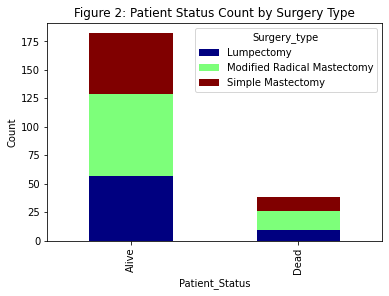

In [62]:
title = 'Figure 2: Patient Status Count by Surgery Type'
surgery = pd.crosstab(ds['Patient_Status'], ds['Surgery_type'])
surgery.plot(kind='bar', ylabel='Count', stacked=True, colormap='jet', title=title)